In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import os
import random
from tqdm import tqdm, tqdm_notebook

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.applications import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.initializers import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from numpy.random import seed
seed(1)
tf.random.set_seed(1)

In [3]:
path='C:/Users/prasa/Downloads/archive/'
artistspath='C:/Users/prasa/Downloads/archive/artists.csv'
artists=pd.read_csv(artistspath)
artists.head()

,id,name,years,genre,nationality,bio,wikipedia,paintings
0,0,Amedeo Modigliani,1884 - 1920,Expressionism,Italian,Amedeo Clemente Modigliani (Italian pronunciat...,http://en.wikipedia.org/wiki/Amedeo_Modigliani,193
1,1,Vasiliy Kandinskiy,1866 - 1944,"Expressionism,Abstractionism",Russian,Wassily Wassilyevich Kandinsky (Russian: Васи́...,http://en.wikipedia.org/wiki/Wassily_Kandinsky,88
2,2,Diego Rivera,1886 - 1957,"Social Realism,Muralism",Mexican,Diego María de la Concepción Juan Nepomuceno E...,http://en.wikipedia.org/wiki/Diego_Rivera,70
3,3,Claude Monet,1840 - 1926,Impressionism,French,Oscar-Claude Monet (; French: [klod mɔnɛ]; 14 ...,http://en.wikipedia.org/wiki/Claude_Monet,73
4,4,Rene Magritte,1898 - 1967,"Surrealism,Impressionism",Belgian,René François Ghislain Magritte (French: [ʁəne...,http://en.wikipedia.org/wiki/René_Magritte,194


In [4]:
#In order to ensure we only pick artists with a sufficient number of artwork we filter out artists with less than 200 paintings
artists=artists.sort_values(by=['paintings'],ascending=False)
artists

,id,name,years,genre,nationality,bio,wikipedia,paintings
8,8,Vincent van Gogh,1853 – 1890,Post-Impressionism,Dutch,Vincent Willem van Gogh (Dutch: [ˈvɪnsɛnt ˈʋɪl...,http://en.wikipedia.org/wiki/Vincent_van_Gogh,877
30,30,Edgar Degas,1834 - 1917,Impressionism,French,Edgar Degas (US: or UK: ; born Hilaire-Germai...,http://en.wikipedia.org/wiki/Edgar_Degas,702
13,13,Pablo Picasso,1881 - 1973,Cubism,Spanish,Pablo Ruiz Picasso (; Spanish: [ˈpaβlo piˈkaso...,http://en.wikipedia.org/wiki/Pablo_Picasso,439
15,15,Pierre-Auguste Renoir,1841 - 1919,Impressionism,French,"Pierre-Auguste Renoir, commonly known as Augus...",http://en.wikipedia.org/wiki/Pierre-Auguste_Re...,336
19,19,Albrecht Dürer,1471 - 1528,Northern Renaissance,German,Albrecht Dürer (; German: [ˈʔalbʁɛçt ˈdyːʁɐ]; ...,http://en.wikipedia.org/wiki/Albrecht_Dürer,328
46,46,Paul Gauguin,1848 – 1903,"Symbolism,Post-Impressionism",French,"Eugène Henri Paul Gauguin (UK: , US: ; French:...",http://en.wikipedia.org/wiki/Paul_Gauguin,311
16,16,Francisco Goya,1746 - 1828,Romanticism,Spanish,Francisco José de Goya y Lucientes (; Spanish:...,http://en.wikipedia.org/wiki/Francisco_Goya,291
31,31,Rembrandt,1606 - 1669,Baroque,Dutch,Rembrandt Harmenszoon van Rijn (; Dutch: [ˈrɛm...,http://en.wikipedia.org/wiki/Rembrandt,262
20,20,Alfred Sisley,1839 - 1899,Impressionism,"French,British",Alfred Sisley (; French: [sislɛ]; 30 October 1...,http://en.wikipedia.org/wiki/Alfred_Sisley,259
32,32,Titian,1488 - 1576,"High Renaissance,Mannerism",Italian,Tiziano Vecelli or Tiziano Vecellio (pronounce...,http://en.wikipedia.org/wiki/Titian,255


In [5]:
topartists=artists[artists['paintings']>=200].reset_index()
topartists=topartists[['name','paintings']]
topartists

,name,paintings
0,Vincent van Gogh,877
1,Edgar Degas,702
2,Pablo Picasso,439
3,Pierre-Auguste Renoir,336
4,Albrecht Dürer,328
5,Paul Gauguin,311
6,Francisco Goya,291
7,Rembrandt,262
8,Alfred Sisley,259
9,Titian,255


In [6]:
'''I am assinging a class weight for each artist to make sure any one artist is not overrepresented.
Since Van Gogh has the most paintings he would have the lowest class weight and correspondingly
Marc Chagall would have the highest class weight. To calculate class weight I am doing a simple weighted sum.
'''
topartists['class_weight']=topartists.paintings.sum()/(topartists.shape[0]*topartists.paintings)
topartists

,name,paintings,class_weight
0,Vincent van Gogh,877,0.445631
1,Edgar Degas,702,0.556721
2,Pablo Picasso,439,0.890246
3,Pierre-Auguste Renoir,336,1.163149
4,Albrecht Dürer,328,1.191519
5,Paul Gauguin,311,1.256650
6,Francisco Goya,291,1.343018
7,Rembrandt,262,1.491672
8,Alfred Sisley,259,1.508951
9,Titian,255,1.532620


In [7]:
#Converting class weights into a dictionary
class_weight=topartists['class_weight'].to_dict()
class_weight

{0: 0.44563076604125634,
 1: 0.5567210567210568,
 2: 0.8902464278318493,
 3: 1.1631493506493507,
 4: 1.1915188470066518,
 5: 1.2566501023092662,
 6: 1.3430178069353327,
 7: 1.491672449687717,
 8: 1.5089505089505089,
 9: 1.532620320855615,
 10: 1.6352225180677062}

In [8]:
'''
There is some error with Albrecht Dürer's name where the path is not ready properly.
As a temporary fix I manually insert a space in his name, replacing the original one and while
looking for his folder I replace that space again with an underscore and this seems to work.
Must investigate as to the underlying cause of this problem.
'''
updated_name = "Albrecht_Dürer".replace("_", " ")
topartists.iloc[4, 0]=updated_name
topartists.iloc[4,0]

'Albrecht Dürer'

In [9]:
images_dir=path+'images/images/'
artists_dir=os.listdir(images_dir)
topartists_names=topartists['name'].str.replace(' ','_').values
for name in topartists_names:
    if os.path.exists(os.path.join(images_dir,name)):
        print("Found "+name)
    else:
        print("Error "+name)
        

Found Vincent_van_Gogh
Found Edgar_Degas
Found Pablo_Picasso
Found Pierre-Auguste_Renoir
Found Albrecht_Dürer
Found Paul_Gauguin
Found Francisco_Goya
Found Rembrandt
Found Alfred_Sisley
Found Titian
Found Marc_Chagall


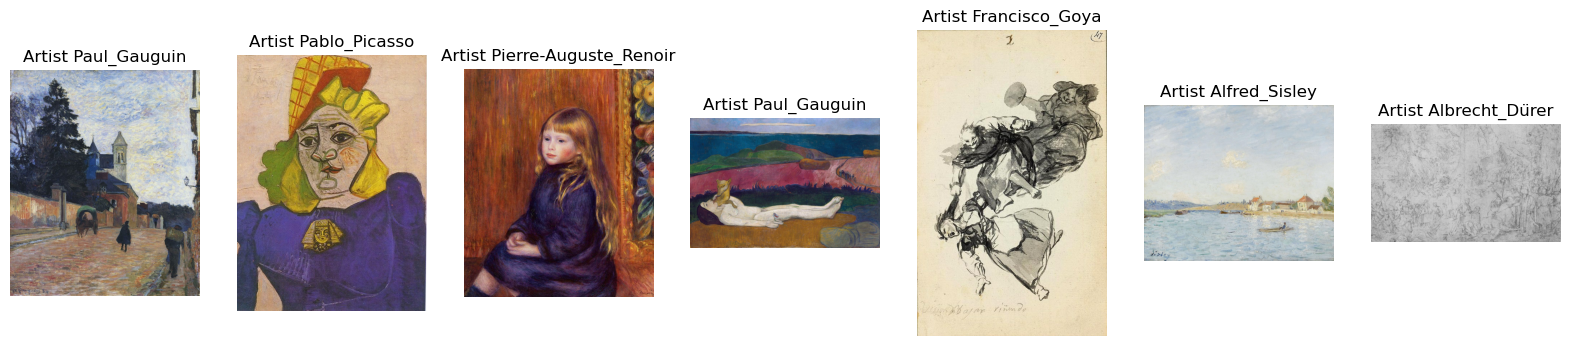

In [10]:
#Printing some random paintings
n=7
fig, axes = plt.subplots(1,n,figsize=(20,10))
for i in range(n):
    random_artist = random.choice(topartists_names)
    random_image = random.choice(os.listdir(os.path.join(images_dir,random_artist)))
    random_image_path=os.path.join(images_dir,random_artist,random_image)
    image=plt.imread(random_image_path)
    axes[i].imshow(image)
    axes[i].set_title('Artist '+random_artist)
    axes[i].axis('off')
plt.show()

In [11]:
batch_size=16
train_input_shape=(224,224,3)
n_classes=topartists.shape[0]

train_datagenerator = ImageDataGenerator(validation_split=0.2,
                                         rescale=1./255.,
                                         shear_range=5,
                                         horizontal_flip=True,
                                         vertical_flip=True)
train_generator=train_datagenerator.flow_from_directory(directory=images_dir,class_mode='categorical',target_size=train_input_shape[0:2],
                                                        batch_size=batch_size,subset="training",shuffle=True,
                                                        classes=topartists_names.tolist())
validation_generator=train_datagenerator.flow_from_directory(directory=images_dir,class_mode='categorical',target_size=train_input_shape[0:2],
                                                             batch_size=batch_size,subset="validation",shuffle=True,
                                                             classes=topartists_names.tolist())
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=validation_generator.n//validation_generator.batch_size
print("Total number of batches = ",STEP_SIZE_TRAIN, "and", STEP_SIZE_VALID)

Found 3444 images belonging to 11 classes.
Found 855 images belonging to 11 classes.
Total number of batches =  215 and 53


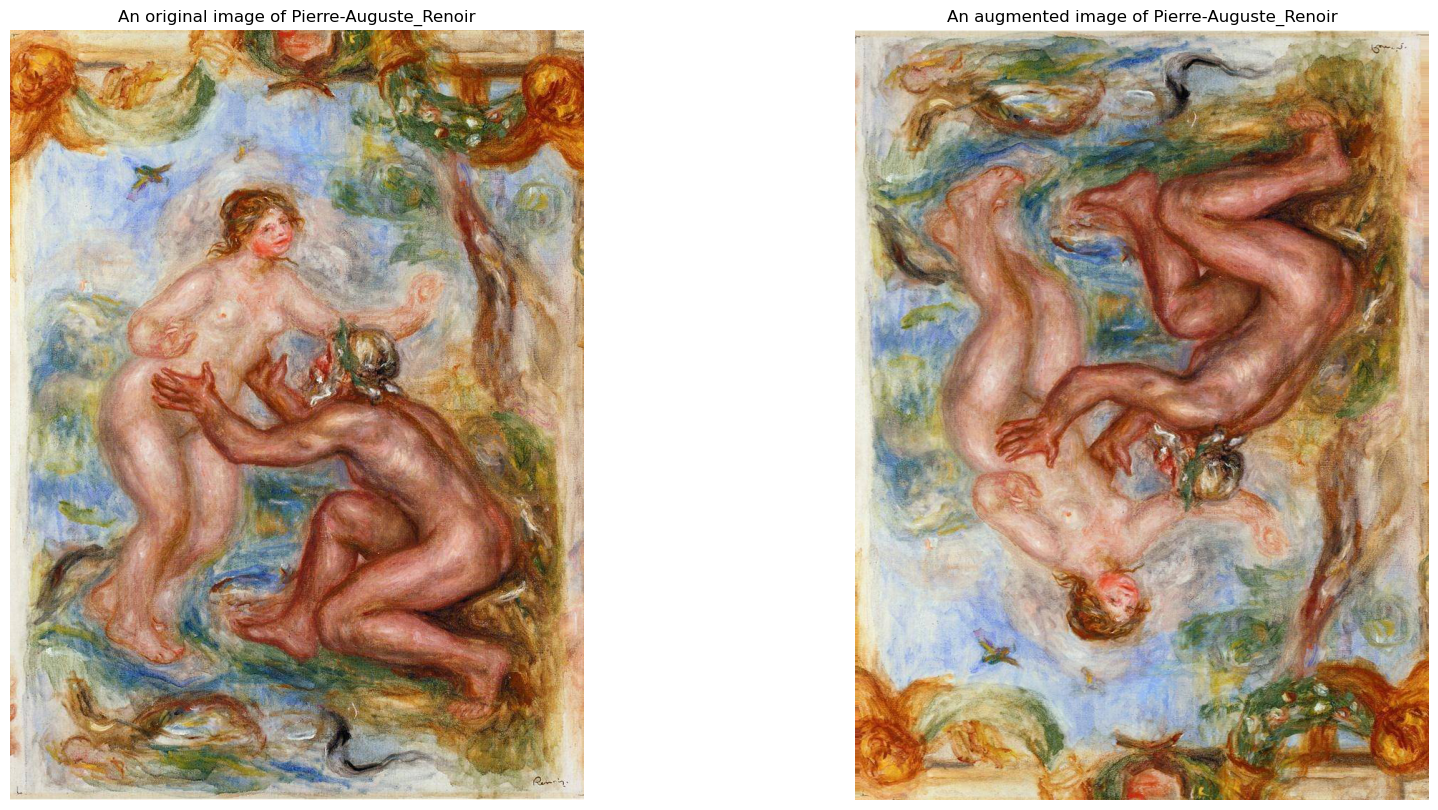

In [12]:
#Printing a random painting and its augmented version
fig,axes=plt.subplots(1,2,figsize=(20,10))
random_artist=random.choice(topartists_names)
random_image=random.choice(os.listdir(os.path.join(images_dir,random_artist)))
random_image_path=os.path.join(images_dir,random_artist,random_image)

image=plt.imread(random_image_path)
axes[0].imshow(image)
axes[0].set_title("An original image of "+random_artist)
axes[0].axis('off')

aug_image=train_datagenerator.random_transform(image)
axes[1].imshow(aug_image)
axes[1].set_title("An augmented image of "+random_artist)
axes[1].axis('off')

plt.show()

In [13]:
#Loading the pre-trained baseline model
base_model = ResNet50(weights='imagenet',include_top=False,input_shape=train_input_shape)
for layer in base_model.layers:
    layer.trainable=True

In [14]:
#Adding layers to the base model
X = base_model.output
X = Flatten()(X)

X = Dense(512, kernel_initializer='he_uniform')(X)
X = BatchNormalization()(X)
X = Activation('relu')(X)

X = Dense(16, kernel_initializer='he_uniform')(X)
X = BatchNormalization()(X)
X = Activation('relu')(X)

output = Dense(n_classes, activation='softmax')(X)
model = Model(inputs=base_model.input, outputs=output)

In [15]:
optimizer = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy',optimizer=optimizer, metrics=['accuracy'])

In [16]:
n_epoch=10
early_stop = EarlyStopping(monitor='val_loss', patience=20, verbose=1, mode='auto', restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, mode='auto')

In [17]:
history = model.fit_generator(generator=train_generator, steps_per_epoch=STEP_SIZE_TRAIN,validation_data=validation_generator,validation_steps=STEP_SIZE_VALID,
                              epochs=n_epoch, shuffle=True, verbose=1, callbacks=[reduce_lr], class_weight=class_weight)

C:\Users\prasa\AppData\Local\Temp\ipykernel_26472\1932100240.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_generator, steps_per_epoch=STEP_SIZE_TRAIN,validation_data=validation_generator,validation_steps=STEP_SIZE_VALID,


Epoch 1/10


215/215 [==============================] - 568s 3s/step - loss: 2.0053 - accuracy: 0.3159 - val_loss: 22.0198 - val_accuracy: 0.0613 - lr: 0.0010
Epoch 2/10
215/215 [==============================] - 565s 3s/step - loss: 1.6815 - accuracy: 0.4230 - val_loss: 3.8306 - val_accuracy: 0.0613 - lr: 0.0010
Epoch 3/10
215/215 [==============================] - 499s 2s/step - loss: 1.5158 - accuracy: 0.4597 - val_loss: 2.4200 - val_accuracy: 0.1368 - lr: 0.0010
Epoch 4/10
215/215 [==============================] - 444s 2s/step - loss: 1.3997 - accuracy: 0.5012 - val_loss: 2.9480 - val_accuracy: 0.1757 - lr: 0.0010
Epoch 5/10
215/215 [==============================] - 471s 2s/step - loss: 1.3061 - accuracy: 0.5193 - val_loss: 1.9416 - val_accuracy: 0.4127 - lr: 0.0010
Epoch 6/10
215/215 [==============================] - 435s 2s/step - loss: 1.2214 - accuracy: 0.5569 - val_loss: 1.5485 - val_accuracy: 0.4741 - lr: 0.0010
Epoch 7/10
215/215 [==============================] - 451s 2s